In [ ]:
# imports
import networkx as nx
import random
from collections import defaultdict
import numpy as np

In [ ]:
first_names = [
    "Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", "Isaac", "Jack",
    "Katie", "Liam", "Mona", "Nathan", "Olivia", "Paul", "Quinn", "Rachel", "Sam", "Tina",
    "Uma", "Victor", "Wendy", "Xander", "Yara", "Zane", "Aaron", "Beth", "Chris", "Diana",
    "Edward", "Fiona", "George", "Heather", "Ian", "Julia", "Kevin", "Laura", "Mike", "Nina",
    "Oscar", "Peter", "Quinn", "Ruby", "Steve", "Trisha", "Ursula", "Vincent", "Willow", "Xavier",
    "Yolanda", "Zach", "Adam", "Bella", "Carl", "Debra", "Elliot", "Faith", "Greg", "Holly",
    "Jason", "Kelly", "Luke", "Maria", "Nick", "Ophelia", "Patrick", "Rebecca", "Scott", "Teresa",
    "Ulysses", "Valerie", "Walter", "Yvonne", "Abe", "Brenda", "Clark", "Denise", "Ethan", "Felicia"
]

In [ ]:
# generate random networks without replacement
# starts by taking 50 names
def draw_50_names(names_list):
    if len(names_list) < 50:
        raise ValueError("The list must contain at least 50 names.")
    return random.sample(names_list, 50)

In [ ]:
# create a random graph with a skewed distribution of connections
def make_linkedin_graph(names, mean=4, sigma=1):
    G = nx.Graph()
    G.add_nodes_from(names)
    num_nodes = len(names)


    degrees = np.random.lognormal(mean=np.log(mean), sigma=sigma, size=num_nodes).astype(int)
    degrees = np.clip(degrees, 1, 20)

    for node, degree in zip(names, degrees):
        connections = random.sample(names, min(degree, num_nodes - 1))
        for connection in connections:
            if node != connection:
                G.add_edge(node, connection)

    return G

In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

def categorize_nodes(names, pct_celebrities=0.05, pct_no_names=0.05):
    num_nodes = len(names)
    num_celebrities = int(num_nodes * pct_celebrities)
    num_no_names = int(num_nodes * pct_no_names)
    num_average = num_nodes - num_celebrities - num_no_names

    categories = (['celebrity'] * num_celebrities +
                  ['no-name'] * num_no_names +
                  ['average'] * num_average)
    random.shuffle(categories)
    return dict(zip(names, categories))

def make_instagram_graph(names, pct_celebrities=0.05, pct_no_names=0.05):
    G = nx.DiGraph()
    G.add_nodes_from(names)
    num_nodes = len(names)

    categories = categorize_nodes(names, pct_celebrities, pct_no_names)
    follow_pattern = {
        'celebrity': {'mean': 5, 'sigma': 1},
        'no-name': {'mean': 10, 'sigma': 2},
        'average': {'mean': 7, 'sigma': 1.5}
    }

    #probability for following and being followed based on category
    follow_prob = {
        'celebrity': 0.6,
        'no-name': 0.6,
        'average': 0.5
    }
    followed_prob = {
        'celebrity': 0.7,
        'no-name': 0.1,
        'average': 0.4
    }

    for node in names:
        category = categories[node]
        mean, sigma = follow_pattern[category]['mean'], follow_pattern[category]['sigma']
        degree = int(np.random.normal(loc=mean, scale=sigma))
        degree = np.clip(degree, 1, num_nodes - 1)

        following_candidates = [n for n in names if n != node and random.random() < follow_prob[category]]


        final_candidates = [n for n in following_candidates if random.random() < followed_prob[categories[n]]]


        final_degree = min(degree, len(final_candidates))
        connections = random.sample(final_candidates, final_degree) if final_candidates else []

        for connection in connections:
            G.add_edge(node, connection)

    return G, categories

In [ ]:
import networkx as nx
import numpy as np

def make_club_graph(names, prob_in_club=0.5, prob_out_club=0.03, club_fraction=0.8):
    G = nx.Graph()
    G.add_nodes_from(names)
    num_nodes = len(names)
    num_clubs = 4


    club_size = int(num_nodes * club_fraction / num_clubs)
    clubs = {}

    for i in range(num_clubs):
        clubs[i] = names[i*club_size : (i+1)*club_size]


    no_club = names[num_clubs*club_size:]


    for club, members in clubs.items():
        for i in range(len(members)):
            for j in range(i + 1, len(members)):
                if np.random.rand() < prob_in_club:
                    G.add_edge(members[i], members[j])


    for i in range(len(names)):
          for j in range(i + 1, len(names)):
              if np.random.rand() < prob_out_club:
                  G.add_edge(names[i], names[j])

    return G

In [ ]:
import networkx as nx

def combine_graphs(graph_list):
    combined = nx.MultiDiGraph()


    for graph in graph_list:
        combined.add_nodes_from(graph.nodes(data=True))


    added_edges = set()


    for graph in graph_list:
        edges_to_add = graph.edges(data=True, keys=True) if isinstance(graph, nx.MultiDiGraph) else graph.edges(data=True)
        for edge in edges_to_add:

            u, v, attrs = edge[0], edge[1], edge[2] if len(edge) > 2 else {}


            if not graph.is_directed():
                u, v = sorted((u, v))


            edge_key = (u, v, frozenset(attrs.items()))


            if edge_key not in added_edges:
                combined.add_edge(u, v, **attrs)
                added_edges.add(edge_key)


    for node in combined.nodes():
        combined.nodes[node]['attr'] = {}
        for graph in graph_list:
            if node in graph.nodes():
                combined.nodes[node]['attr'].update(graph.nodes[node])

    return combined


In [ ]:
def calculate_centrality_metrics(G):
    if isinstance(G, nx.MultiDiGraph):
        G = nx.DiGraph(G)

    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G, wf_improved=True)

    metrics = {
        'in_degree_centrality': {node: score * 0.7 for node, score in in_degree_centrality.items()},
        'out_degree_centrality': {node: score * 0.5 for node, score in out_degree_centrality.items()},
        'closeness_centrality': {node: score * 0.5 for node, score in closeness_centrality.items()},
        'betweenness_centrality': nx.betweenness_centrality(G, normalized=True),
    }


    hits_hubs, hits_auth = nx.hits(G, max_iter=1000)
    metrics['HITS_hubs'] = {node: score * 5 for node, score in hits_hubs.items()}
    metrics['HITS_authorities'] = {node: score * 5 for node, score in hits_auth.items()}
    eigenvector_scores = nx.eigenvector_centrality_numpy(G, max_iter=1000)
    metrics['eigenvector_centrality'] = {node: score * 2 for node, score in eigenvector_scores.items()}

    return metrics

In [ ]:
import networkx as nx
from collections import defaultdict

def get_top_n_recommendations(G, metric_scores, user, top_n=5, score_type='overall'):

    first_degree = set(nx.neighbors(G, user))
    first_degree.add(user)

    # Second-degree connections
    second_degree = set()
    for neighbor in first_degree:
        if neighbor != user:
            second_degree.update(nx.neighbors(G, neighbor))
    second_degree -= first_degree

    if score_type == 'overall':
        combined_scores = defaultdict(float)
        for scores in metric_scores.values():
            for node, score in scores.items():
                if node in second_degree:
                    combined_scores[node] += score
        sorted_nodes = sorted(combined_scores.items(), key=lambda item: item[1], reverse=True)
    else:

        filtered_scores = {node: score for node, score in metric_scores.items() if node in second_degree}
        sorted_nodes = sorted(filtered_scores.items(), key=lambda item: item[1], reverse=True)


    recommendations = sorted_nodes[:top_n]
    return recommendations


In [ ]:
def get_aggregated_recommendations(G, user, top_n=5):
    metrics = calculate_centrality_metrics(G)
    all_recommendations = defaultdict(float)
    recommendation_sources = defaultdict(list)
    individual_scores = defaultdict(lambda: defaultdict(float))

    for metric_name, metric_scores in metrics.items():
        top_recs = get_top_n_recommendations(G, metric_scores, user, top_n, score_type=metric_name)
        for node, score in top_recs:
            all_recommendations[node] += score
            recommendation_sources[node].append(metric_name)
            individual_scores[node][metric_name] = score

    sorted_nodes = sorted(all_recommendations.items(), key=lambda item: item[1], reverse=True)

    recommendations = []
    explanations = []
    for node, score in sorted_nodes[:top_n]:
        recommendations.append(node)
        breakdown = "\n  ".join(f"{metric}: {individual_scores[node][metric]:.2f}" for metric in recommendation_sources[node])
        explanation = f"Overall goodness score: {score:.2f}\n  {breakdown}"
        explanations.append(explanation)

    return recommendations, explanations


Now that we have all our functions programmed, we can begin our project breakdown

For our networks we are aggregating professional (linkedin) and social (instagram)

In [ ]:
linkedin_names = draw_50_names(first_names)
instagram_names = draw_50_names(first_names)
club_names = first_names

linkedin = make_linkedin_graph(linkedin_names)
club = make_club_graph(club_names)
instagram, categories = make_instagram_graph(instagram_names, pct_celebrities=0.04, pct_no_names=0.03)

# Combine the networks
combined_network = combine_graphs([linkedin, instagram, club])


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


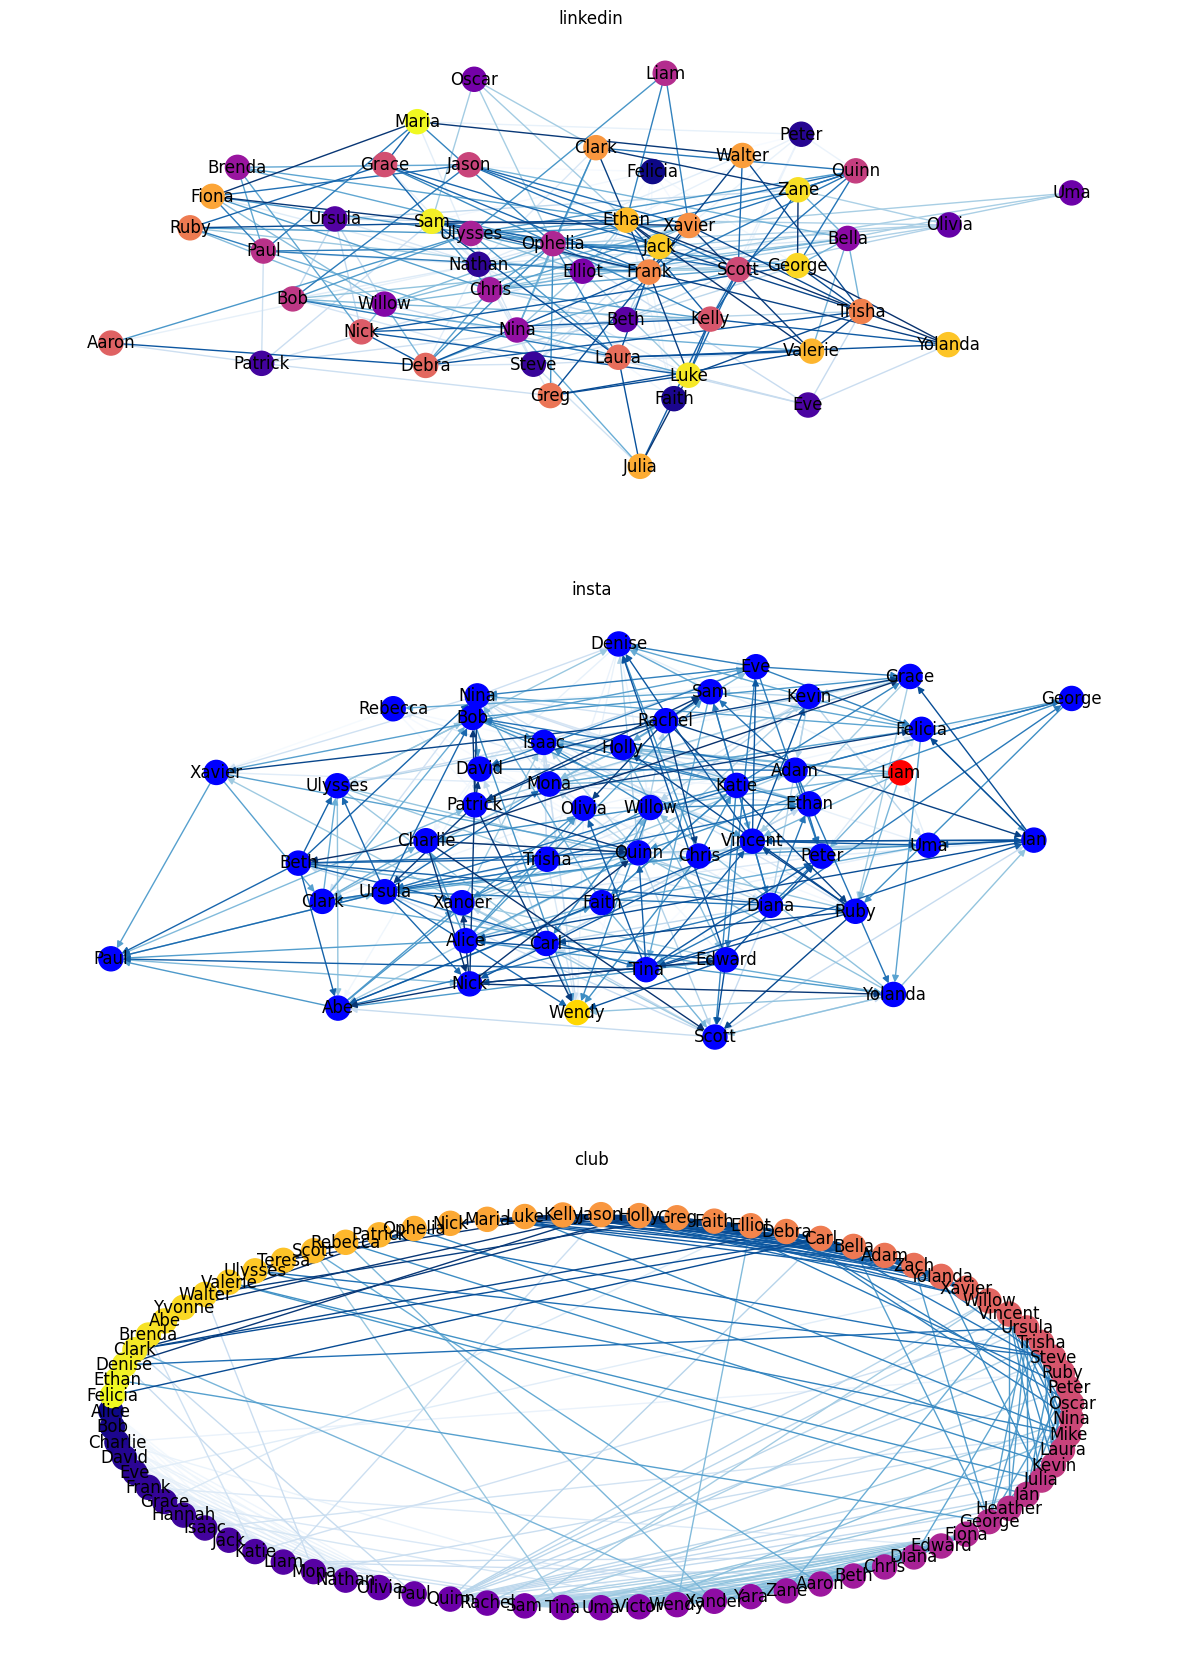

In [ ]:
import matplotlib.pyplot as plt

def draw_graph(G, pos, ax, title):
    node_colors = range(G.number_of_nodes())
    edge_colors = range(G.number_of_edges())

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.plasma, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)

    ax.set_title(title)
    ax.axis('off')

def draw_insta_graph(G, pos, ax, title):
    colors = {'celebrity': 'gold', 'no-name': 'red', 'average': 'blue'}
    node_colors = [colors[categories[n]] for n in G.nodes()]
    edge_colors = range(G.number_of_edges())


    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.plasma, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)

    ax.set_title(title)
    ax.axis('off')

# Create a subplot for each graph
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 21))


pos1 = nx.spring_layout(linkedin)
pos2 = nx.spring_layout(instagram)
pos3 = nx.shell_layout(club)



# Draw the graphs
draw_graph(linkedin, pos1, ax1, 'linkedin')
draw_insta_graph(instagram, pos2, ax2, 'insta')
draw_graph(club, pos3, ax3, 'club')


# Show the plot
plt.show()



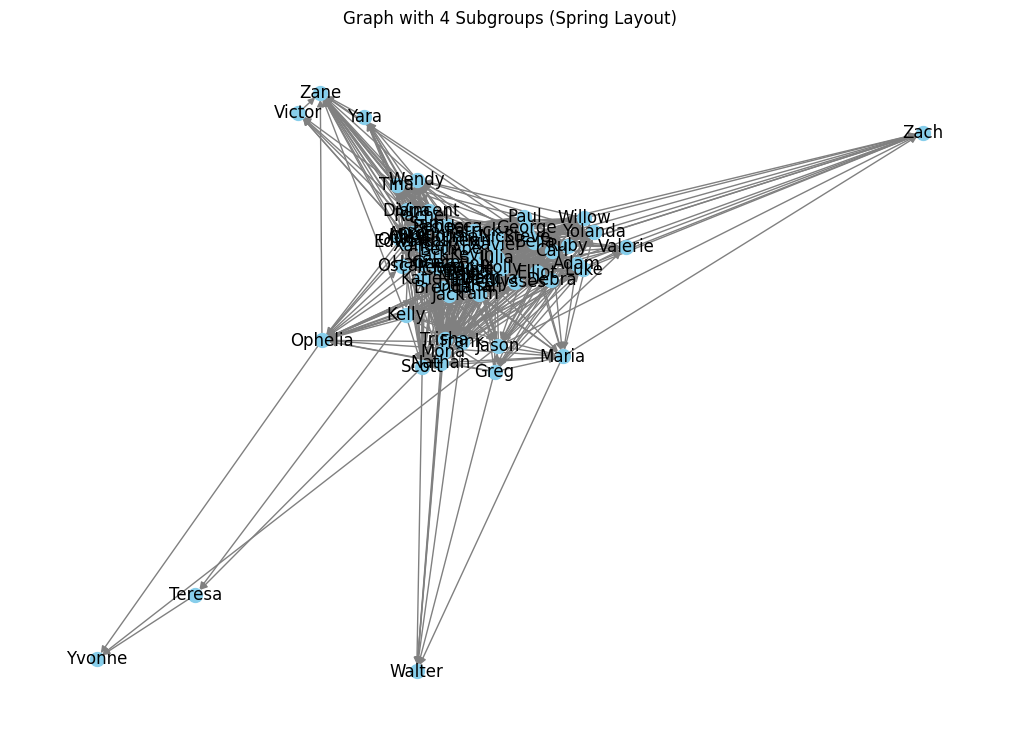

In [ ]:
def draw_graph_with_layout(G, layout_func, title):
    pos = layout_func(G)  # Compute the layout

    # Draw the graph
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='grey', node_size=100, font_size=12)
    plt.title(title)
    plt.axis('off')
    plt.show()

draw_graph_with_layout(combined_network, nx.spring_layout, 'Graph with 4 Subgroups (Spring Layout)')



In [ ]:

def draw_graph_with_highlights(G, highlighted_nodes, special_node, title):

    pos = nx.spring_layout(G)


    pos[special_node] = [0, 0]


    for node in pos:
        if node != special_node:
            pos[node] += [0.5, 0.5]


    node_colors = []
    for node in G.nodes():
        if node == special_node:
            node_colors.append('green')
        elif node in highlighted_nodes:
            node_colors.append('red')
        else:
            node_colors.append('grey')

    edge_colors = 'grey'

    plt.figure(figsize=(10, 7))

    # Draw the graph
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    nx.draw_networkx_labels(G, pos)

    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# only here for testing without using anvil
while True:
    user_name = input()
    if user_name in combined_network:
        # Convert multigraph to simple graph

        recommendations, explanations = get_aggregated_recommendations(combined_network, user_name, 5)
        print(f"Top 5 recommendations for {user_name}:")
        for i, (rec, expl) in enumerate(zip(recommendations, explanations)):
            print(f"{i+1}. {rec}")
            print(expl)
        print("\n")
        # Draw the graph with highlights
        draw_graph_with_highlights(combined_network, recommendations, user_name, 'Graph with Highlighted Nodes and Special Node')
    else:
        print(f"{user_name} not found in the network. Please try again.")

Alice
Top 5 recommendations for Alice:
1. Quinn
Overall goodness score: 1.51
  in_degree_centrality: 0.31
  closeness_centrality: 0.30
  betweenness_centrality: 0.05
  HITS_authorities: 0.22
  eigenvector_centrality: 0.64
2. Vincent
Overall goodness score: 1.06
  in_degree_centrality: 0.20
  closeness_centrality: 0.26
  HITS_authorities: 0.14
  eigenvector_centrality: 0.46
3. Steve
Overall goodness score: 0.80
  in_degree_centrality: 0.20
  betweenness_centrality: 0.04
  HITS_authorities: 0.15
  eigenvector_centrality: 0.41
4. Ruby
Overall goodness score: 0.72
  closeness_centrality: 0.26
  eigenvector_centrality: 0.46
5. Xavier
Overall goodness score: 0.64
  in_degree_centrality: 0.21
  closeness_centrality: 0.26
  betweenness_centrality: 0.03
  HITS_authorities: 0.14




KeyboardInterrupt: 

In [ ]:
def get_top_recommendations(user_name, n):
    if user_name in combined_network:
        # Convert multigraph to simple graph

        recommendations, explanations = get_aggregated_recommendations(combined_network, user_name, n)
        print(f"Top 5 recommendations for {user_name}:")
        for i, (rec, expl) in enumerate(zip(recommendations, explanations)):
            print(f"{i+1}. {rec}")
            print(expl)
        print("\n")
        # Draw the graph with highlights
        draw_graph_with_highlights(combined_network, recommendations, user_name, 'Graph with Highlighted Nodes and Special Node')
    else:
        print(f"{user_name} not found in the network. Please try again.")

def returnrecommendations(user_name, n):
    result = ""

    if user_name in combined_network:
        # Convert multigraph to simple graph

        recommendations, explanations = get_aggregated_recommendations(combined_network, user_name, n)
        result += f"Top {n} recommendations for {user_name}:\n"
        for i, (rec, expl) in enumerate(zip(recommendations, explanations)):
            result += f"{i+1}. {rec}\n"
            result += f"{expl}\n\n"

        # Draw the graph with highlights
        # draw_graph_with_highlights(combined_network, recommendations, user_name, 'Graph with Highlighted Nodes and Special Node')
    else:
        result += f"{user_name} not found in the network. Please try again.\n"

    return result

In [ ]:
pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=15ce7270fb3f950813b0dd6d779ffba06686b7b01e488286cbf63cc022c8b072
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server
anvil.server.connect("server_UYQYFUKDCDBLD5N4YFLVXVND-HVMPZ27YCSTOUJXY")

@anvil.server.callable
def get_recs(name, num):
  return returnrecommendations(name, int(num))


anvil.server.wait_forever()

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Development" as SERVER
